In [2]:
from tensorflow import keras
import tensorflow as tf

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_tags),(test_images,test_tags) = fashion_mnist.load_data()

model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [4]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get("loss") < 0.4):
            print("提前终止训练")
            self.model.stop_training = "True"

In [6]:
train_images_scale = train_images /255
test_images_scale = test_images / 255
callback = myCallBack()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
callback = myCallBack()
model.fit(train_images_scale.reshape(-1,28,28,1),train_tags,epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.6027 - accuracy: 0.7760
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3027 - accuracy: 0.8870
提前终止训练


In [12]:
model.evaluate(test_images.reshape(-1,28,28,1),test_tags)

313/313 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.8235


[0.47699418663978577, 0.8234999775886536]

In [11]:
import numpy as np
print(np.argmax(model.predict(test_images[0].reshape(1,28,28,1))))

9


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [18]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.inputs,outputs=layer_outputs)
pred = activation_model.predict(test_images_scale[0].reshape(1,28,28,1))

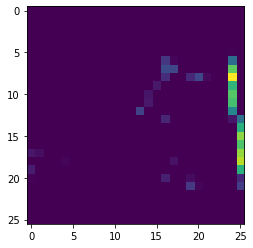

In [20]:
import matplotlib.pyplot as plt
plt.imshow(pred[0][0,:,:,2])

In [63]:
test = test_images[0].reshape(1,28,28,1)

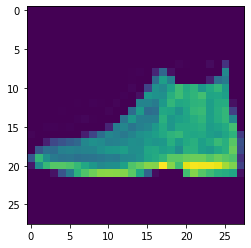

In [66]:
plt.imshow(test[0,:,:,0])

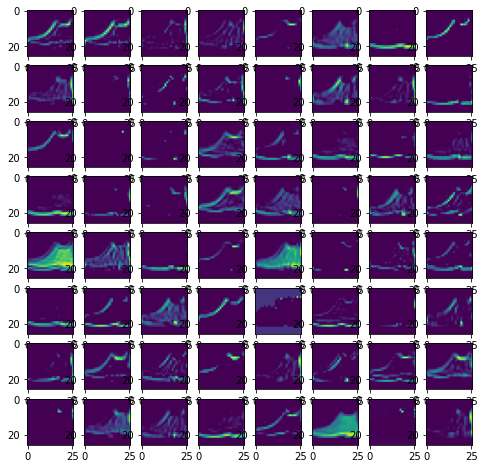

In [15]:
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pred[0][0,:,:,i])

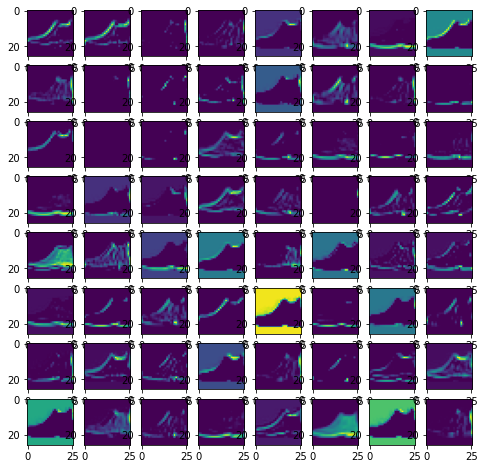

In [21]:
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pred[0][0,:,:,i])